In [1]:
import pandas as pd
import numpy as np
# from google.colab import files
# uploaded = files.upload()


## Preprocessing data

In [2]:
import io
# data_set_org = pd.read_csv(io.BytesIO(uploaded['train.csv']),sep=";" )
# Read data set
data_set_org = pd.read_csv('train.csv',sep=";" ) 
print(data_set_org.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
# Test missing data
for col in range(len(data_set_org.columns)):
    missing_data = data_set_org[data_set_org.columns[col]].isna().sum()
    missing_percentage = missing_data / len(data_set_org) * 100
    print(data_set_org.columns[col])
    print(f"column: {col} has {missing_percentage} %")

age
column: 0 has 0.0 %
job
column: 1 has 0.0 %
marital
column: 2 has 0.0 %
education
column: 3 has 0.0 %
default
column: 4 has 0.0 %
balance
column: 5 has 0.0 %
housing
column: 6 has 0.0 %
loan
column: 7 has 0.0 %
contact
column: 8 has 0.0 %
day
column: 9 has 0.0 %
month
column: 10 has 0.0 %
duration
column: 11 has 0.0 %
campaign
column: 12 has 0.0 %
pdays
column: 13 has 0.0 %
previous
column: 14 has 0.0 %
poutcome
column: 15 has 0.0 %
y
column: 16 has 0.0 %


In [4]:
# Test unknown data
for col in range(len(data_set_org.columns)):
    missing_data = (data_set_org[data_set_org.columns[col]] == "unknown").sum()
    missing_percentage = missing_data / len(data_set_org) * 100
    print(data_set_org.columns[col])
    print(f"column: {col} has {missing_percentage} %")

age
column: 0 has 0.0 %
job
column: 1 has 0.6370131162770122 %
marital
column: 2 has 0.0 %
education
column: 3 has 4.1074074893278185 %
default
column: 4 has 0.0 %
balance
column: 5 has 0.0 %
housing
column: 6 has 0.0 %
loan
column: 7 has 0.0 %
contact
column: 8 has 28.798301298356595 %
day
column: 9 has 0.0 %
month
column: 10 has 0.0 %
duration
column: 11 has 0.0 %
campaign
column: 12 has 0.0 %
pdays
column: 13 has 0.0 %
previous
column: 14 has 0.0 %
poutcome
column: 15 has 81.74780473778506 %
y
column: 16 has 0.0 %


In [7]:
# Replace unknown data which attributes have small unknown data rate, strategy is use mode 
data_set_org.job = data_set_org.job.replace("unknown",data_set_org.job.mode()[0])
data_set_org.education = data_set_org.education.replace("unknown",data_set_org.education.mode()[0])

In [6]:
print (data_set_org.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [7]:
for col in range(len(data_set_org.columns)):
    print(data_set_org.columns[col],data_set_org[data_set_org.columns[col]].dtypes)
#show attributes dtypes

age int64
job object
marital object
education object
default object
balance int64
housing object
loan object
contact object
day int64
month object
duration int64
campaign int64
pdays int64
previous int64
poutcome object
y object


 #### Take sample data

In [ ]:
# data_sample_1 = data_set_org[data_set_org.y == "yes" ].sample(10)
# data_sample_2 = data_set_org[data_set_org.y == "no"].sample(10)
# data_sample_20 = pd.concat([data_sample_1,data_sample_2])
# print(data_sample_20)


In [ ]:
# data_sample_20.to_csv('data_sample.csv')
# files.download('data_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Naive Bayes

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,auc
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
gnb = GaussianNB()
X = data_set_org.drop('y',axis=1)
y = data_set_org['y']
y = le.fit_transform(y)
# Encode data
for col in range(len(X.columns)):
  if data_set_org[data_set_org.columns[col]].dtypes == object:
    X[X.columns[col]] = le.fit_transform( X[X.columns[col]])
    print(X.columns[col],dict(enumerate(set(le.inverse_transform(X[X.columns[col]]))))) 
    # Use dict and set to remember original data of transformed data
print()
print(X.head())
print(y[:5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=0)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
#Evaluate Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-measure: {f_measure:.2f}')
print(f'AUC: {auc:.2f}')

job {0: 'entrepreneur', 1: 'admin.', 2: 'services', 3: 'student', 4: 'technician', 5: 'self-employed', 6: 'retired', 7: 'management', 8: 'unemployed', 9: 'housemaid', 10: 'blue-collar'}
marital {0: 'married', 1: 'single', 2: 'divorced'}
education {0: 'primary', 1: 'tertiary', 2: 'secondary'}
default {0: 'yes', 1: 'no'}
housing {0: 'yes', 1: 'no'}
loan {0: 'yes', 1: 'no'}
contact {0: 'cellular', 1: 'telephone', 2: 'unknown'}
month {0: 'dec', 1: 'oct', 2: 'aug', 3: 'mar', 4: 'apr', 5: 'jul', 6: 'sep', 7: 'jun', 8: 'nov', 9: 'feb', 10: 'jan', 11: 'may'}
poutcome {0: 'failure', 1: 'other', 2: 'unknown', 3: 'success'}

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          1        0     1506        1     0      

### Use matplotlib and seaborn to show values distribution of numeric attributes

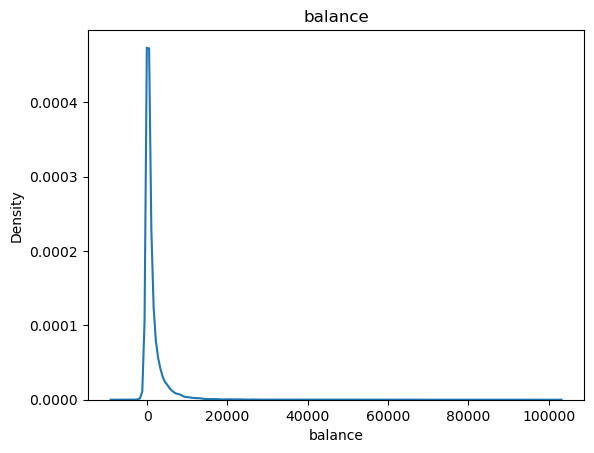

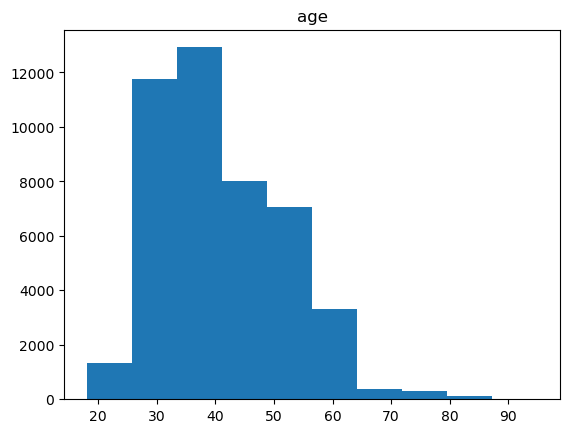

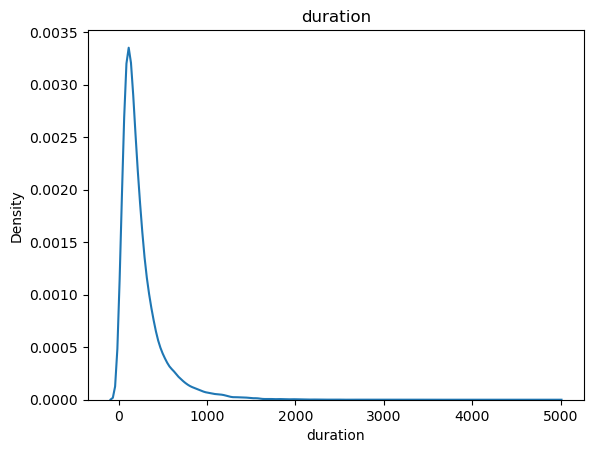

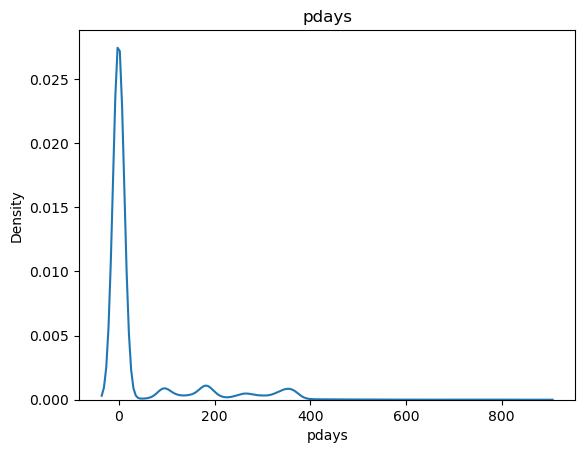

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
u = np.linspace(0,100,len(data_set_org))
fig, ax = plt.subplots()
ax.set_title("balance")
sns.kdeplot(data=data_set_org['balance']);
# ax.plot(u,list)
fig1, ax1 = plt.subplots()
ax1.set_title("age")
ax1.hist(data_set_org['age'])
fig2, ax2 = plt.subplots()
ax2.set_title("duration")
sns.kdeplot(data=data_set_org['duration']);
fig3, ax3 = plt.subplots()
ax3.set_title("pdays")
sns.kdeplot(data=data_set_org['pdays']);


#### Decision Tree

[Text(0.6710526315789473, 0.9166666666666666, 'duration <= 521.5\ngini = 0.207\nsamples = 45161\nvalue = [39877, 5284]\nclass = no'),
 Text(0.4473684210526316, 0.75, 'month <= 9.5\ngini = 0.143\nsamples = 40191\nvalue = [37087, 3104]\nclass = no'),
 Text(0.39473684210526316, 0.5833333333333334, 'pdays <= 9.5\ngini = 0.125\nsamples = 39034\nvalue = [36422, 2612]\nclass = no'),
 Text(0.21052631578947367, 0.4166666666666667, 'duration <= 313.5\ngini = 0.087\nsamples = 32336\nvalue = [30870, 1466]\nclass = no'),
 Text(0.10526315789473684, 0.25, 'month <= 0.5\ngini = 0.059\nsamples = 27139\nvalue = [26314, 825]\nclass = no'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.239\nsamples = 1201\nvalue = [1034, 167]\nclass = no'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.049\nsamples = 25938\nvalue = [25280, 658]\nclass = no'),
 Text(0.3157894736842105, 0.25, 'contact <= 1.5\ngini = 0.216\nsamples = 5197\nvalue = [4556, 641]\nclass = no'),
 Text(0.2631578947368421, 0

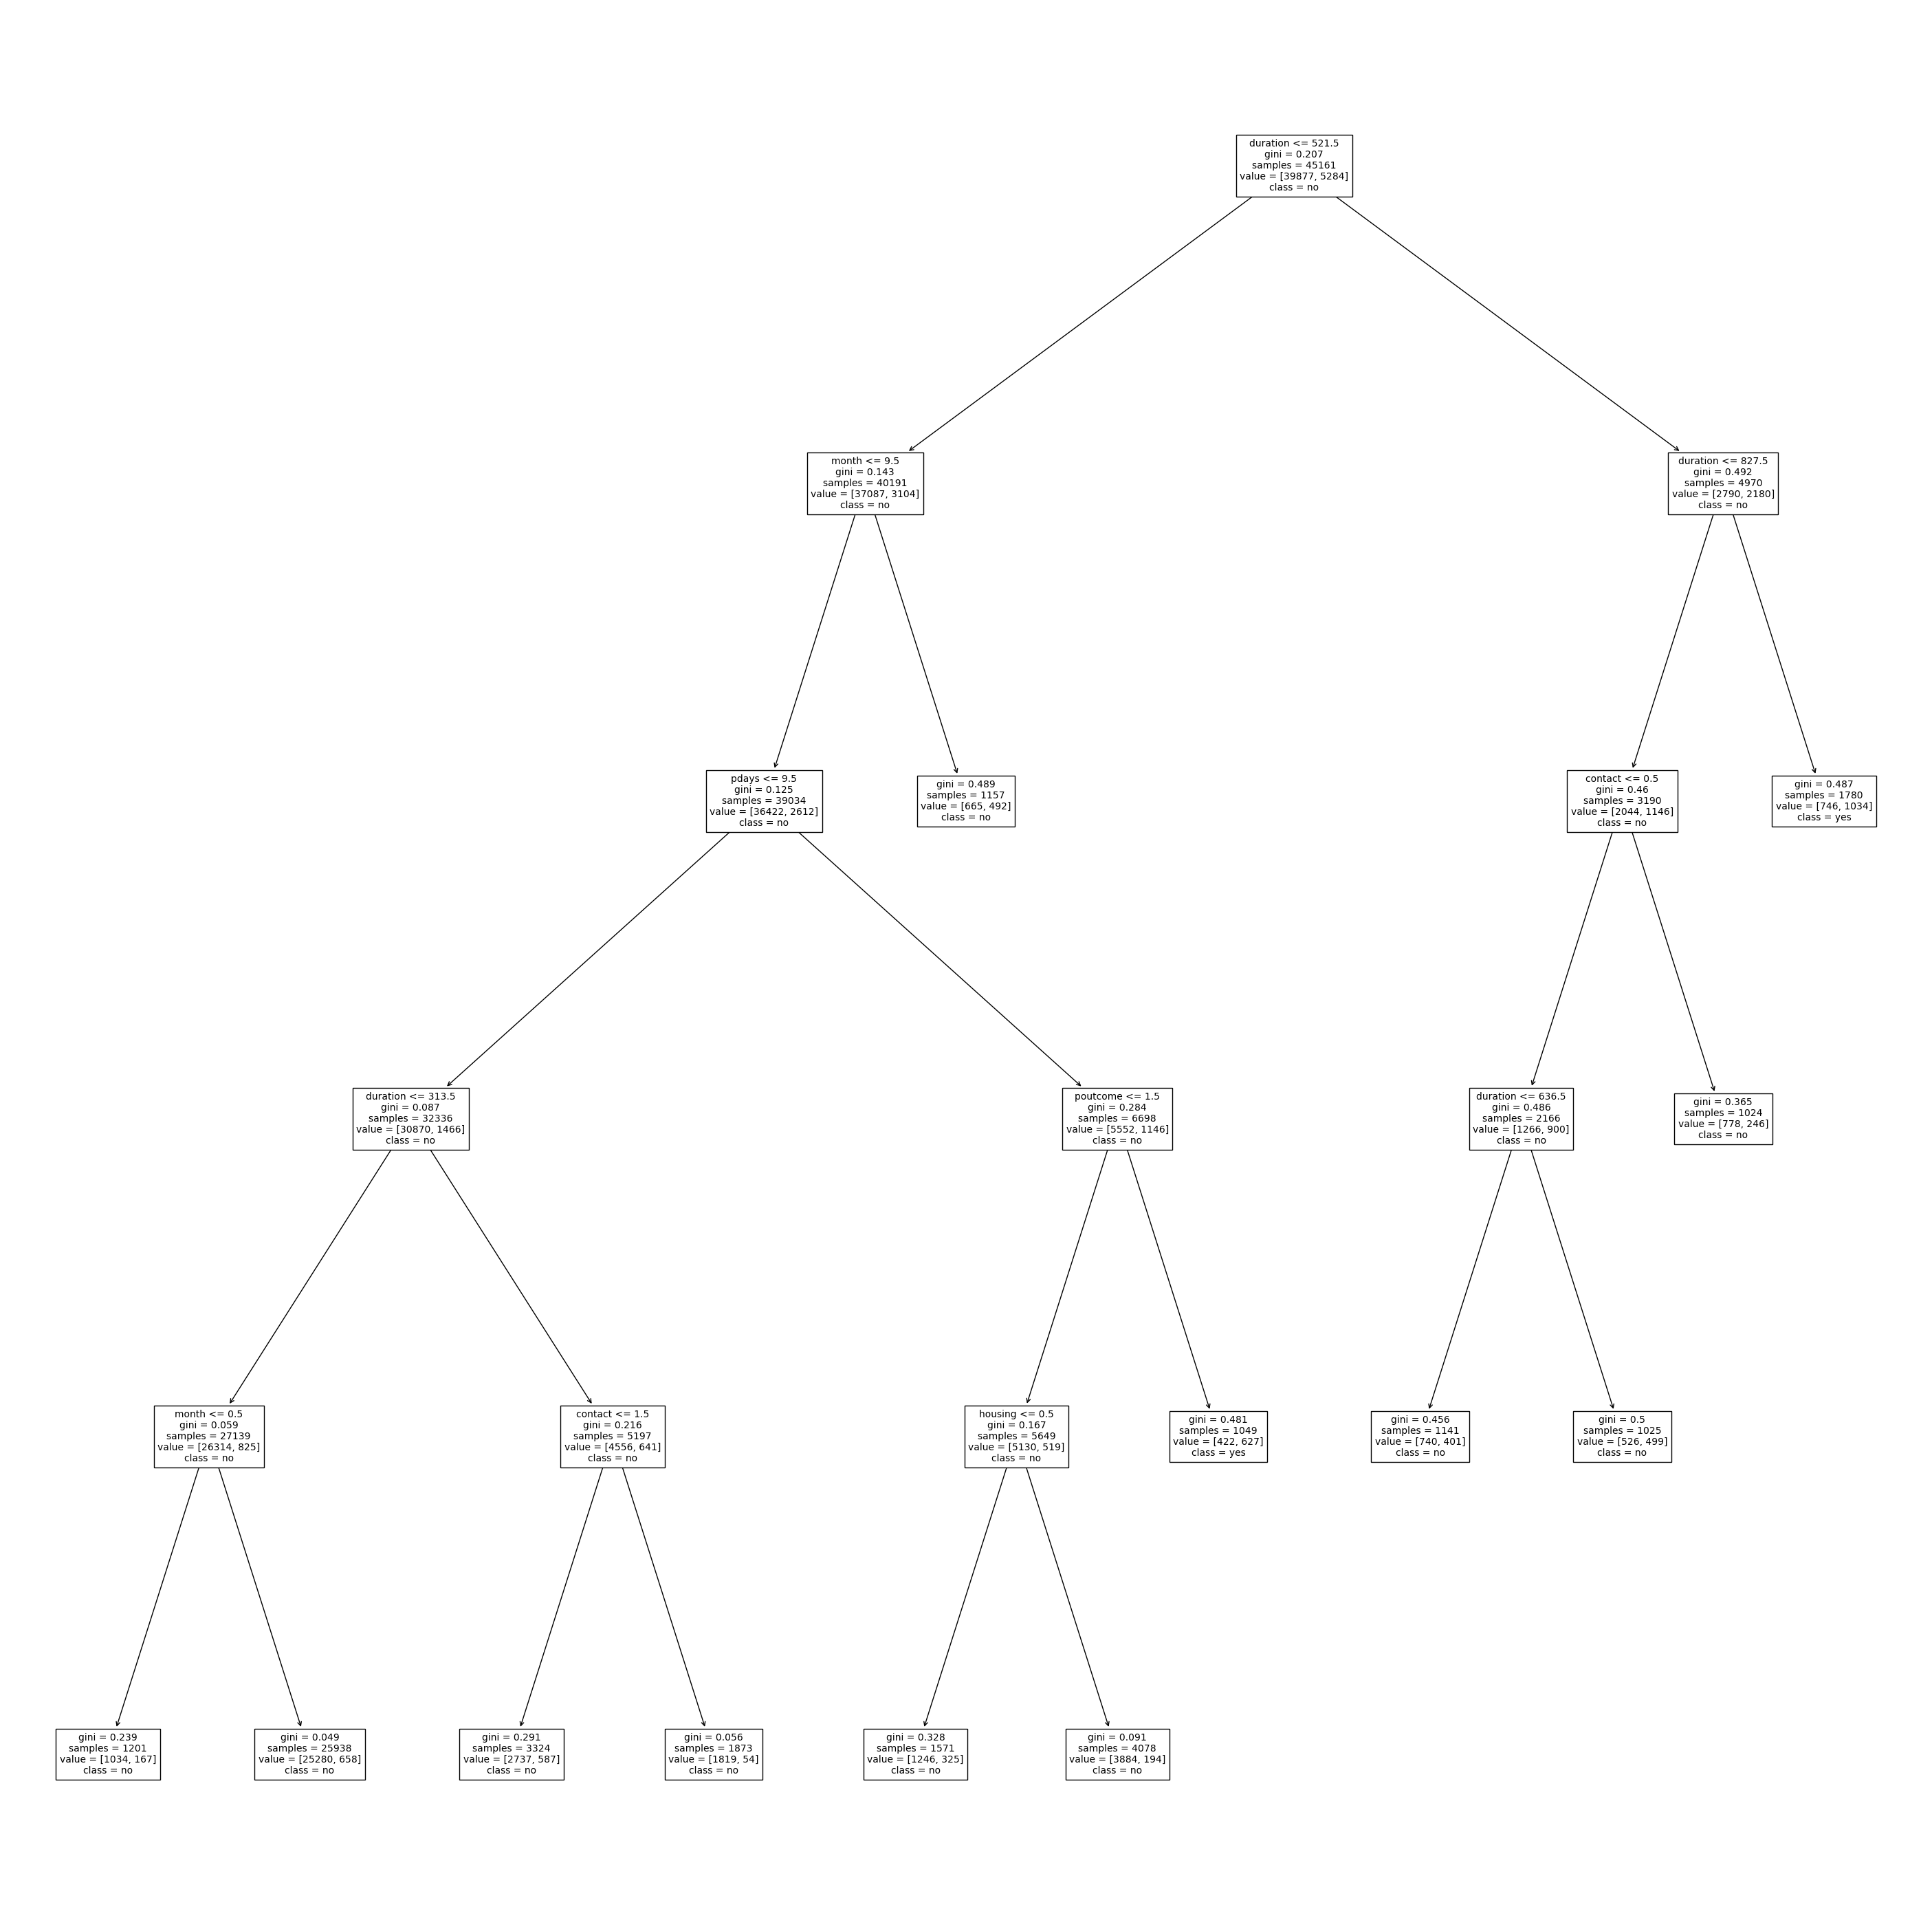

In [39]:
from sklearn import tree
features = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=2000,min_samples_leaf=1000,criterion='gini')
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(36,36))  # set plot size (denoted in inches)
tree.plot_tree(clf,feature_names=features,class_names= ['no','yes'],fontsize=10)



job {0: 'retired', 1: 'entrepreneur', 2: 'blue-collar', 3: 'self-employed', 4: 'student', 5: 'technician', 6: 'services', 7: 'management', 8: 'admin.', 9: 'housemaid', 10: 'unemployed'}

marital {0: 'married', 1: 'divorced', 2: 'single'}

education {0: 'primary', 1: 'tertiary', 2: 'secondary'}

default {0: 'yes', 1: 'no'}

housing {0: 'no', 1: 'yes'}

loan {0: 'yes', 1: 'no'}

contact {0: 'unknown', 1: 'telephone', 2: 'cellular'}

month {0: 'apr', 1: 'sep', 2: 'jul', 3: 'feb', 4: 'nov', 5: 'mar', 6: 'dec', 7: 'oct', 8: 'aug', 9: 'may', 10: 'jan', 11: 'jun'}

poutcome {0: 'failure', 1: 'unknown', 2: 'success', 3: 'other'}

## Evaluate Decision Tree

In [40]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
# clf_new = tree.DecisionTreeClassifier(max_depth=100,min_samples_split=100)
# y_pred = clf_new.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-measure: {f_measure:.2f}')
print(f'AUC: {auc:.2f}')

Number of mislabeled points out of a total 50 points : 3
Accuracy: 0.94
Precision: 0.75
Recall: 0.60
F-measure: 0.67
AUC: 0.79


### More ++

<Axes: xlabel='month', ylabel='balance'>

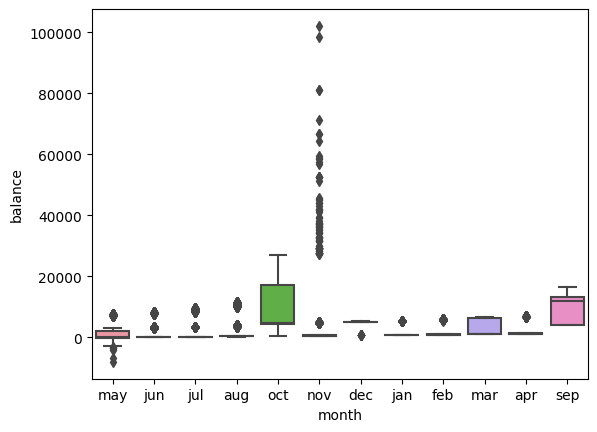

In [ ]:

sns.boxplot(data= data_set_org,x = 'month',y ='balance')



<Axes: xlabel='month', ylabel='pdays'>

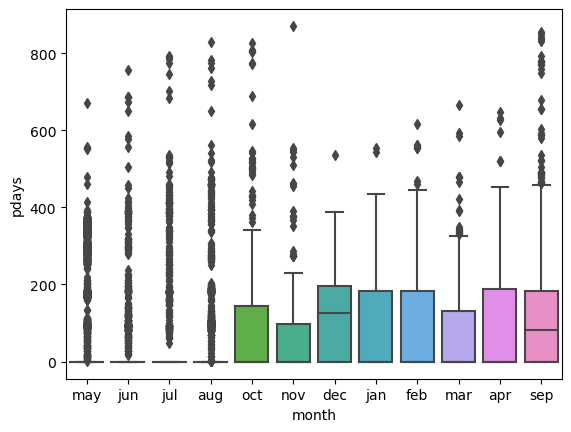

In [14]:
sns.boxplot(data= data_set_org,x = 'month',y = 'pdays')


<Axes: xlabel='month', ylabel='duration'>

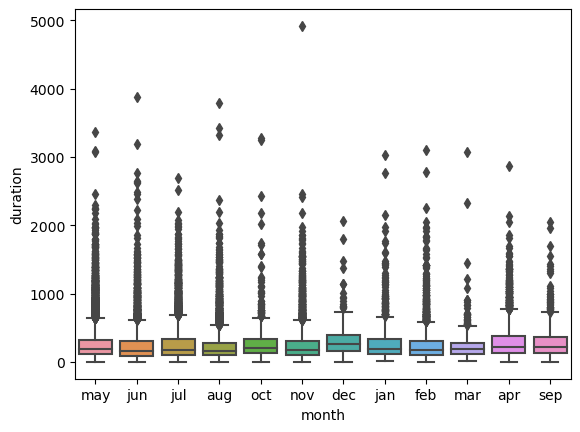

In [15]:
sns.boxplot(data= data_set_org,x = 'month',y = 'duration')


(array([39922.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5289.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

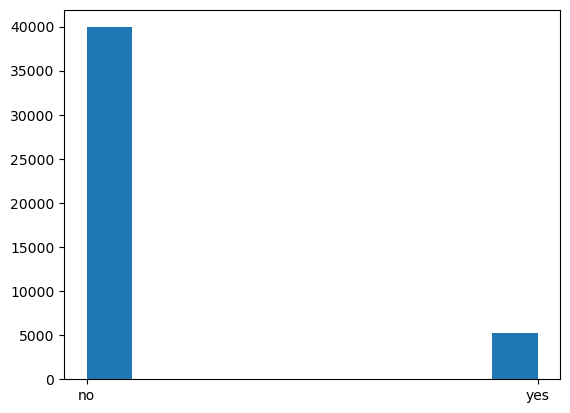

In [16]:
plt.hist(data_set_org['y'])

In [58]:
print(data_set_org.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


(array([3386.,    0.,    0.,  307.,    0.,    0.,  618.,    0.,    0.,
         978.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

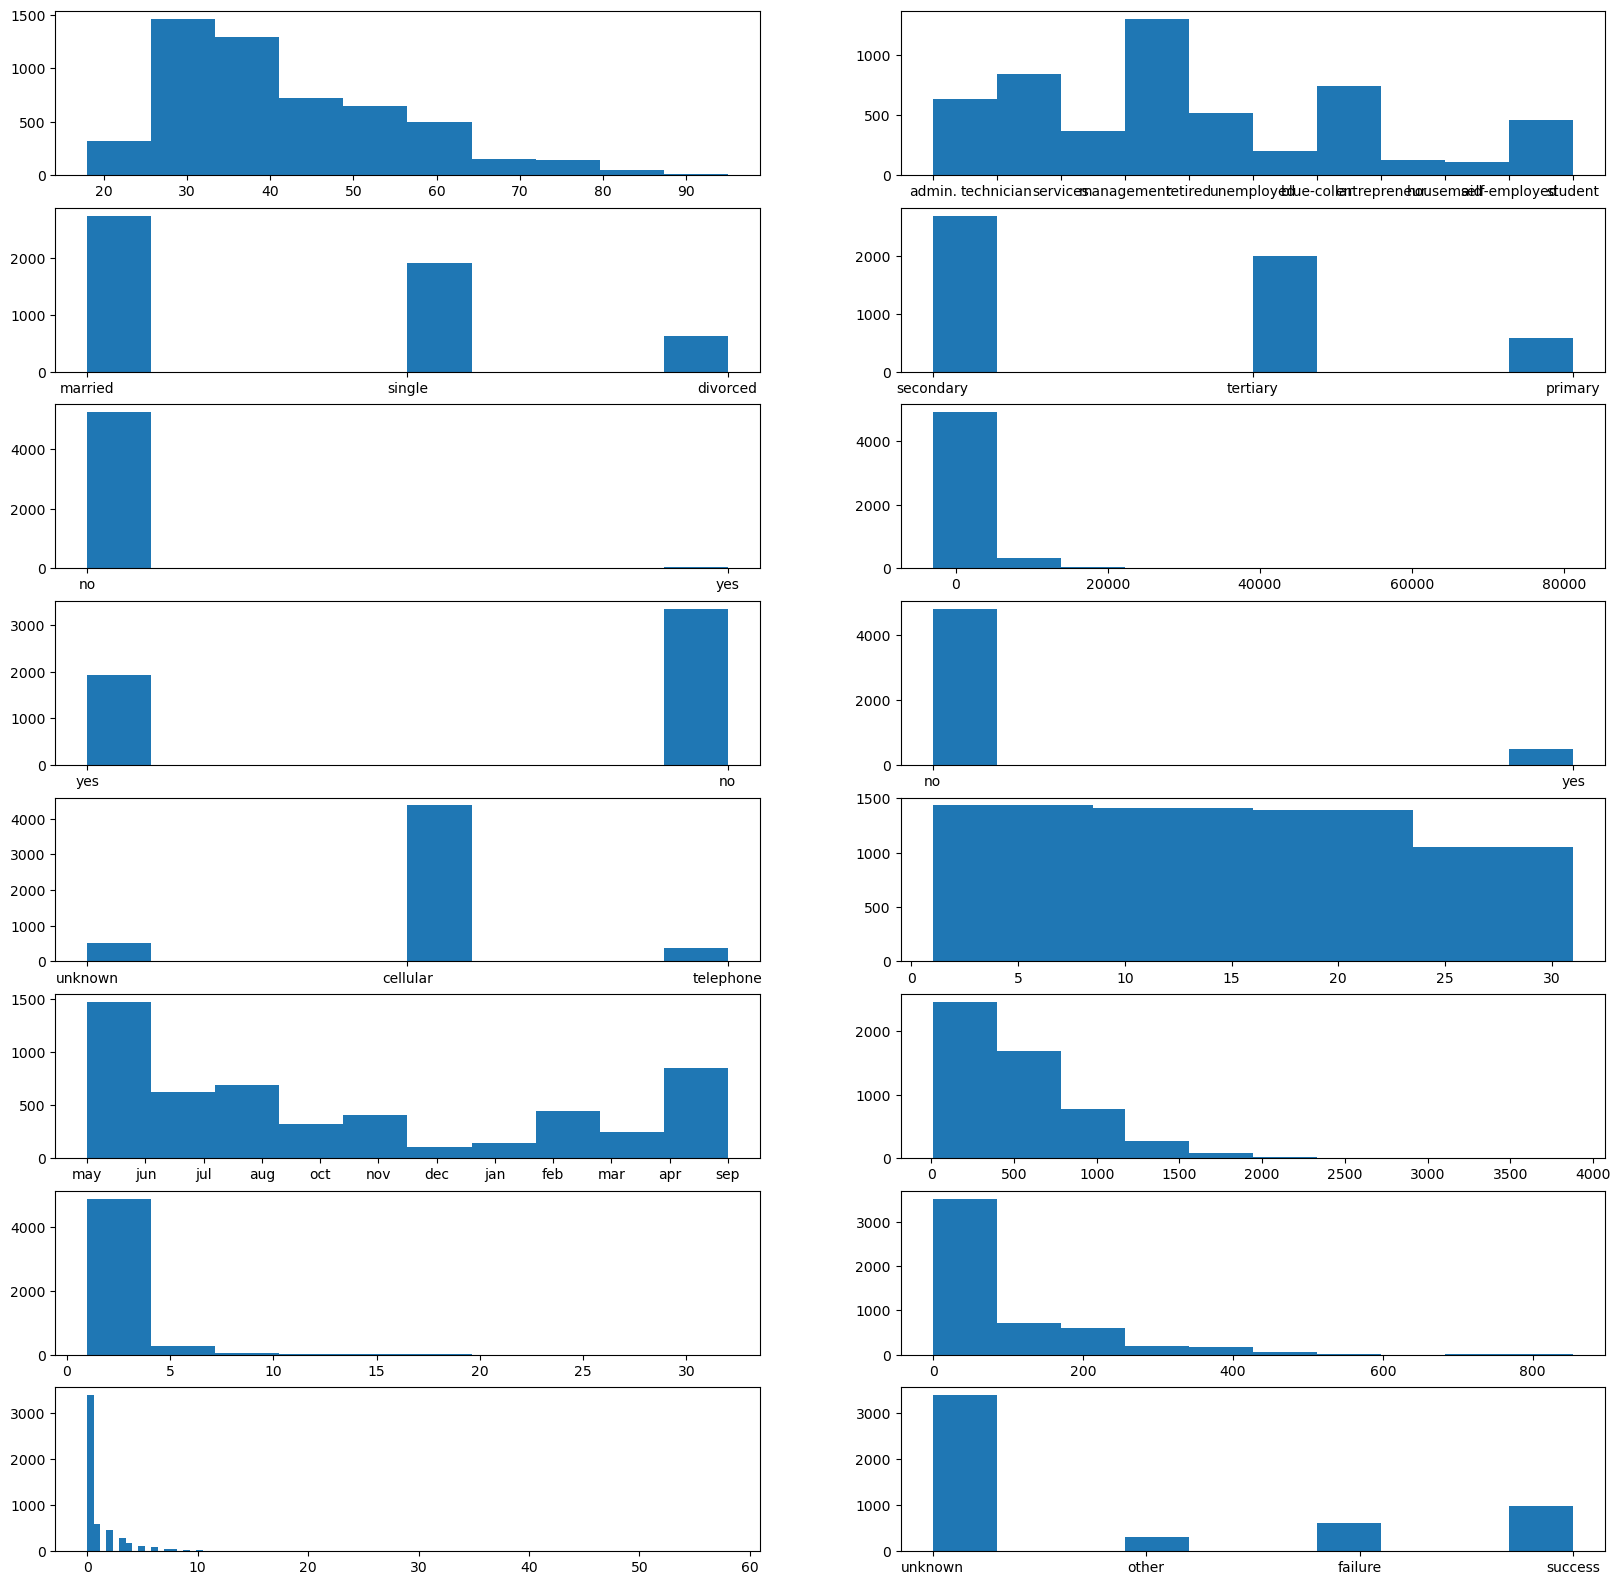

In [90]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16) ) = plt.subplots(nrows=8,
                       ncols=2,figsize=(20,20));
data_yes = data_set_org[data_set_org.y=='yes']
ax1.hist(data_yes['age'])
ax2.hist(data_yes['job'])
ax3.hist(data_yes['marital'])
ax4.hist(data_yes['education'])
ax5.hist(data_yes['default'])
ax6.hist(data_yes['balance'],bins=10)
ax7.hist(data_yes['housing'])
ax8.hist(data_yes['loan'])
ax9.hist(data_yes['contact'])
ax10.hist(data_yes['day'],bins = 4)
ax11.hist(data_yes['month'])
ax12.hist(data_yes['duration'],bins=10)
ax13.hist(data_yes['campaign'])
ax14.hist(data_yes['pdays'])
ax15.hist(data_yes['previous'],bins = 100)
ax16.hist(data_yes['poutcome'])

In [44]:
data_no = data_set_org[data_set_org.y=='no']

(array([33573.,     0.,     0.,  4283.,     0.,     0.,  1533.,     0.,
            0.,   533.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

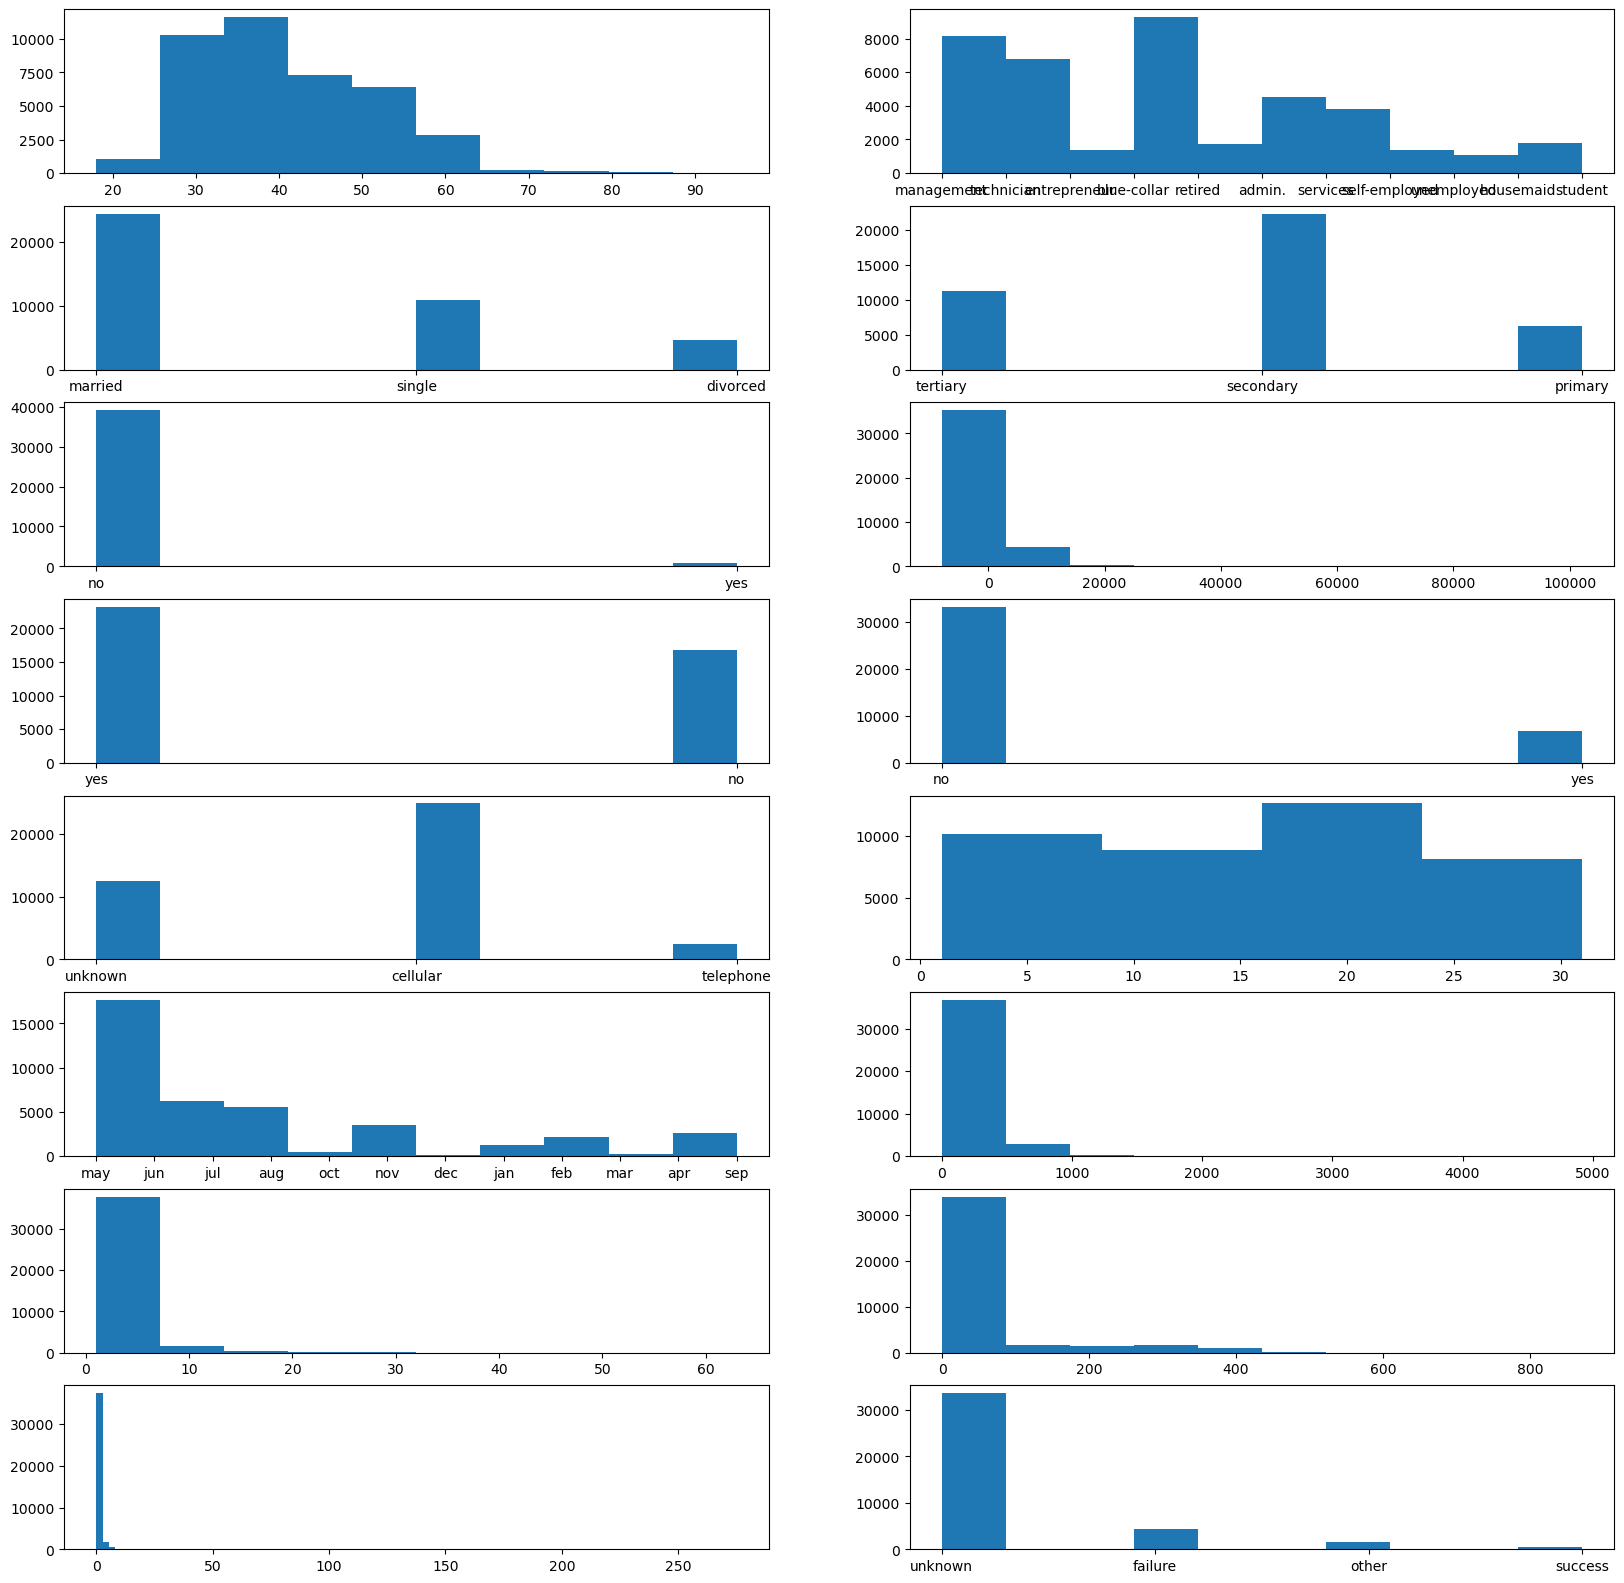

In [45]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16) ) = plt.subplots(nrows=8,
                       ncols=2,figsize=(20,20));
ax1.hist(data_no['age'])
ax2.hist(data_no['job'])
ax3.hist(data_no['marital'])
ax4.hist(data_no['education'])
ax5.hist(data_no['default'])
ax6.hist(data_no['balance'],bins=10)
ax7.hist(data_no['housing'])
ax8.hist(data_no['loan'])
ax9.hist(data_no['contact'])
ax10.hist(data_no['day'],bins = 4)
ax11.hist(data_no['month'])
ax12.hist(data_no['duration'],bins=10)
ax13.hist(data_no['campaign'])
ax14.hist(data_no['pdays'])
ax15.hist(data_no['previous'],bins = 100)
ax16.hist(data_no['poutcome'])